https://github.com/ogrisel/sklearn_pycon2014/blob/master/notebooks/04_supervised_in_depth.ipynb
04_supervised_in_depth.ipynb

Supervised Learning In-Depth: SVMs and Random Forests Machine Learning Algorithms
- Understand how decision trees work
- Understand how multiple decision trees are combined into Random Forests

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Support Vector Machines
- Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. 
    - SVMs are a discriminative classifier: that is, they draw a boundary between clusters of data.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
observations, target = make_blobs(n_samples = 100, centers = 2,
                  random_state = 2, cluster_std = 0.75) # cluster_std ~ Determines How Far Apart The Points Are
plt.scatter(observations[:, 0], observations[:, 1], c = target, s = 15); # s = Size Of Points, c = Color Of Targets

In [ ]:
# Fit Support Vector Machine Classifier To The Points
from sklearn.svm import SVC 
clf = SVC(kernel = 'linear')
clf.fit(observations, target)

In [ ]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return plt.contour(X, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

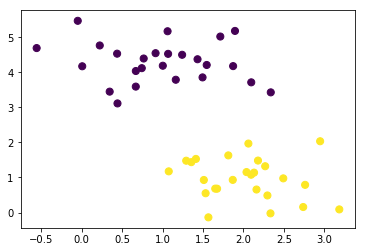

In [114]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,n_features = 2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

In [115]:
X[:4,], y[:4,]

(array([[ 1.41281595,  1.5303347 ],
        [ 1.81336135,  1.6311307 ],
        [ 1.43289271,  4.37679234],
        [ 1.87271752,  4.18069237]]), array([1, 1, 0, 0]))

In [116]:
X.shape
z = X.reshape(-1,2)
z[0:5]

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ]])

In [117]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(z, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, z = np.meshgrid(y, x)
    P = np.zeros_like(z)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return plt.contour(z, Y, P, colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

In [124]:
from sklearn.tree import DecisionTreeClassifier

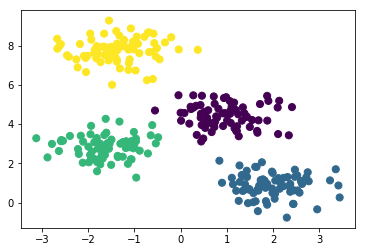

In [125]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)


In [126]:
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.3)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

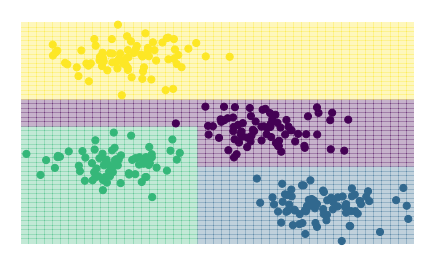

In [127]:
clf = DecisionTreeClassifier(max_depth=10)
plot_estimator(clf, X, y)